In [1]:
import warnings
from IPython import get_ipython

import pandas as pd
import numpy as np


warnings.filterwarnings("ignore")


In [2]:



pip install seaborn as sns

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
path = "../static/Dataset/crop_recommendation.csv"
data = pd.read_csv(path)


In [4]:
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']
labels = data['label']


In [5]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.tail()


,N,P,K,temperature,humidity,ph,rainfall,label
3995,90,33,74,32.166,75.755,6.29,143.148,Litchi
3996,72,36,55,30.250,79.705,6.67,187.676,Litchi
3997,82,53,76,34.272,66.526,6.97,149.691,Litchi
3998,98,43,55,31.956,71.915,7.10,161.002,Litchi
3999,68,54,63,34.157,79.951,6.65,155.692,Litchi


In [7]:
data.shape


(4000, 8)

In [8]:
data.columns  # chck all columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
data.duplicated().sum()  # chcking duplicates in dataset


0

In [10]:
data.isnull().sum()  # checking is there any null value in columns


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
data.info()  # basc info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            4000 non-null   int64  
 1   P            4000 non-null   int64  
 2   K            4000 non-null   int64  
 3   temperature  4000 non-null   float64
 4   humidity     4000 non-null   float64
 5   ph           4000 non-null   float64
 6   rainfall     4000 non-null   float64
 7   label        4000 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 250.1+ KB


In [12]:
data.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,64.54450,50.876750,58.795000,26.403067,65.838082,6.477245,99.157279
std,38.32414,27.469906,47.837873,9.760032,22.965829,0.646827,56.210667
min,0.00000,5.000000,5.000000,7.731822,13.009552,3.504752,15.064021
25%,31.75000,31.000000,26.000000,22.037577,55.118510,6.092081,58.368710
50%,65.00000,48.000000,45.000000,25.834629,69.148000,6.435555,85.338500
75%,93.00000,65.000000,68.000000,29.151438,82.954059,6.860151,122.343900
max,180.00000,145.000000,205.000000,89.055115,99.981876,9.935091,298.560117


In [13]:
data.nunique()  # how many different types are there in datset i.e unique


N               176
P               122
K               197
temperature    3984
humidity       3986
ph             3391
rainfall       3996
label            41
dtype: int64

In [14]:
data['label'].unique()  # unique crops


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee', 'Bajra',
       'Cabbage', 'Cucumber', 'Fenugreek', 'Garlic', 'Ginger', 'Onion',
       'Soybean', 'Spinach', 'Tomato', 'Wheat', 'Tea', 'Cashews',
       'Sugarcane', 'Potatoes', 'Turmeric', 'Okra', 'Brinjal', 'Litchi'],
      dtype=object)

In [15]:
data['label'].value_counts()


label
rice           100
apple          100
Brinjal        100
Okra           100
Turmeric       100
Potatoes       100
Sugarcane      100
Cashews        100
Tea            100
coffee         100
maize          100
cotton         100
coconut        100
papaya         100
orange         100
jute           100
muskmelon      100
watermelon     100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
Litchi         100
pomegranate    100
banana         100
mango          100
grapes         100
Soybean         99
Cucumber        99
Onion           97
Spinach         93
Wheat           93
Cabbage         93
Fenugreek       92
Garlic          89
Tomato          86
Ginger          80
Bajra           79
Name: count, dtype: int64

In [16]:
# creating pivot table
# taking mean value of all labels
crop_summary = pd.pivot_table(data, index=['label'], aggfunc='mean')


In [17]:
crop_summary


,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
Bajra,30.113924,30.645570,29.189873,30.031729,5.875221,51.495229,30.411978
Brinjal,50.680000,58.480000,29.940000,69.825390,6.234500,91.283280,17.500130
Cabbage,177.333333,126.612903,80.655914,96.638971,6.763638,59.753256,15.376099
Cashews,49.800000,58.570000,30.180000,64.700730,6.499500,97.783530,30.031220
Cucumber,125.959596,128.696970,61.494949,64.947374,6.463512,62.032457,27.806506
Fenugreek,30.663043,30.108696,30.663043,21.207489,6.727959,42.047527,15.577910
Garlic,60.449438,75.146067,60.674157,47.398697,6.476042,19.654873,27.460204
Ginger,59.725000,90.312500,60.325000,79.162910,6.223605,89.512736,82.044153
Litchi,64.310000,79.930000,45.500000,69.893200,6.759600,163.420760,32.563560


In [18]:
# Empty list for storing
acc = []
model = []


In [19]:
X = data.drop('label', axis=1)
y = data['label']


In [20]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    features, target, test_size=0.2, shuffle=True, random_state=2)


SVM

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm, Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))


SVM's Accuracy is:  0.98125
              precision    recall  f1-score   support

       Bajra       1.00      1.00      1.00        15
     Brinjal       1.00      1.00      1.00        22
     Cabbage       1.00      1.00      1.00        15
     Cashews       0.89      0.85      0.87        20
    Cucumber       0.94      0.89      0.91        18
   Fenugreek       1.00      1.00      1.00        16
      Garlic       1.00      1.00      1.00        12
      Ginger       1.00      1.00      1.00        19
      Litchi       1.00      1.00      1.00        24
        Okra       0.86      0.90      0.88        20
       Onion       1.00      1.00      1.00        14
    Potatoes       0.96      1.00      0.98        24
     Soybean       1.00      1.00      1.00        17
     Spinach       1.00      1.00      1.00        21
   Sugarcane       1.00      1.00      1.00        20
         Tea       1.00      1.00      1.00        22
      Tomato       0.89      0.94      0.91        17

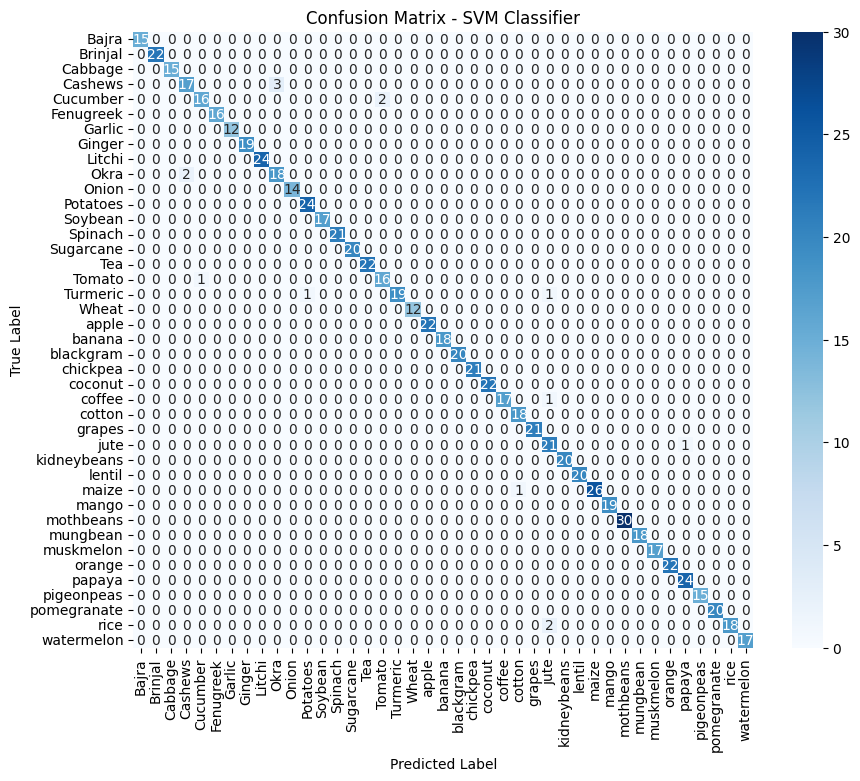

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Ytest, predicted_values)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=SVM.classes_, yticklabels=SVM.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()


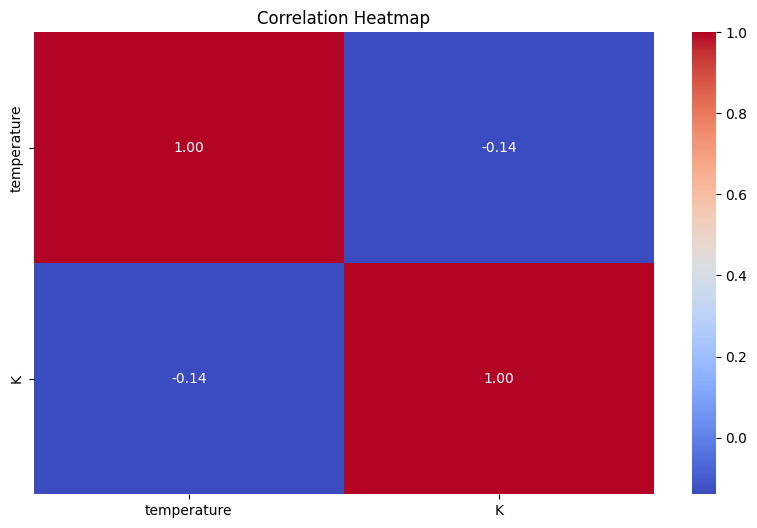

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data[['temperature', 'K']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Saving SVM Model

In [ ]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../saved_models/SVMClassifier1.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()


Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain, Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Testing Accuracy is: ", x)

print(classification_report(Ytest, predicted_values))


RF's Testing Accuracy is:  0.98875
              precision    recall  f1-score   support

       Bajra       1.00      1.00      1.00        15
     Brinjal       1.00      1.00      1.00        22
     Cabbage       1.00      1.00      1.00        15
     Cashews       0.95      0.90      0.92        20
    Cucumber       0.95      1.00      0.97        18
   Fenugreek       1.00      1.00      1.00        16
      Garlic       1.00      1.00      1.00        12
      Ginger       1.00      1.00      1.00        19
      Litchi       1.00      0.92      0.96        24
        Okra       0.90      0.95      0.93        20
       Onion       1.00      1.00      1.00        14
    Potatoes       0.96      1.00      0.98        24
     Soybean       1.00      1.00      1.00        17
     Spinach       1.00      1.00      1.00        21
   Sugarcane       1.00      1.00      1.00        20
         Tea       1.00      1.00      1.00        22
      Tomato       1.00      0.94      0.97   

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../saved_models/RandomForest2.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()


Accuracy Comparison

In [33]:
accuracy_models = dict(zip(model, acc))
for modelName, accuracy in accuracy_models.items():
    print(modelName, ':', accuracy)


SVM : 0.98125
RF : 0.98875


Prediction

In [36]:

Nitrogen = float(input("Enter Nitrogen Value: "))
Phosporus = float(input("Enter Phosporus Value: "))
Potasium = float(input("Enter Potasium Value: "))
temperature = float(input("Enter temperature Value: "))
humidity = float(input("Enter humidity Value: "))
ph = float(input("Enter pH Value: "))
rainfall = float(input("Enter rainfall Value: "))

data = np.array(
    [[Nitrogen, Phosporus, Potasium, temperature, humidity, ph, rainfall]])
prediction = RF.predict(data)
print("You should Grow :", prediction)
# 16,70,20,24.80467592,40.1242747,5.6093956,121.5639121,pigeonpeas


You should Grow : ['pigeonpeas']


In [26]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc


In [37]:
probs = RF.predict_proba(Xtest)


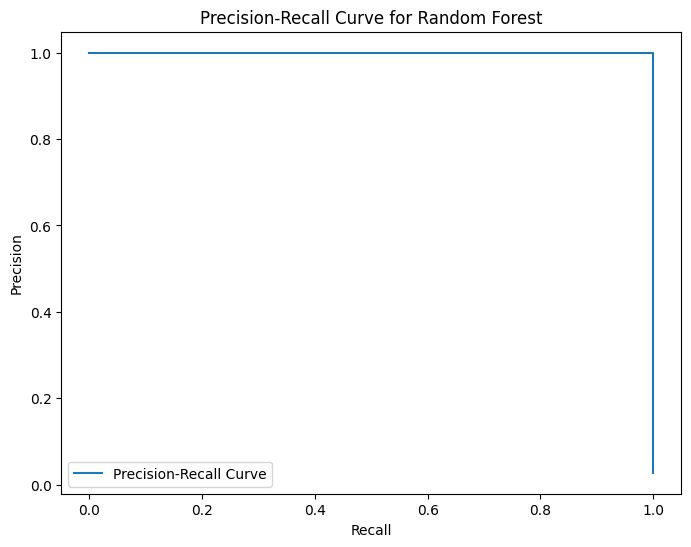

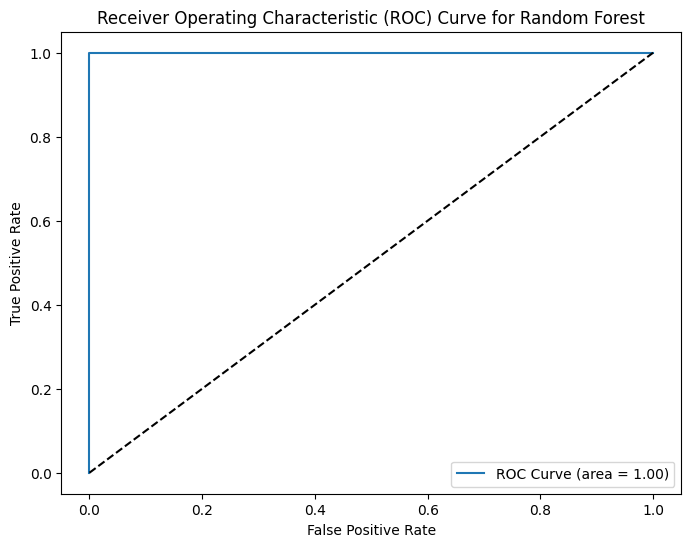

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate probabilities for each class using the predict_proba method of the trained Random Forest model
probs = RF.predict_proba(Xtest)

# Calculate precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(Ytest, probs[:, 1], pos_label=RF.classes_[1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend()
plt.show()

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(Ytest, probs[:, 1], pos_label=RF.classes_[1])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()
